# Analysing the data
## First, importing the data from SQL joined together with the relevant columns

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os


In [2]:
load_dotenv()
password = os.getenv("DATABASE_PASSWORD")
db_name = os.getenv("DATABASE_NAME")
port = os.getenv("DATABASE_PORT")
hostname = os.getenv("DATABASE_HOSTNAME")
username = os.getenv("DATABASE_USERNAME")

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{hostname}:{port}/{db_name}")

In [8]:
# pollution: geo_code, pm25_2007, pm25_2024, pm10_2007, pm10__2024, no2_2007, no2_2024
# imd2007: join(msoa11_code), score
# imd2024: join(msoac), imd19_score, msoarank

query = "SELECT p.geo_code, p.geo_label, p.pm25_2007, p.pm25_2024, p.pm10_2007, p.pm10_2024, p.no2_2007, p.no2_2024, sub.imd07_score, sub.imd19_score, sub.msoarank as msoarank19 from pollution_msoa p left join (select i7.msoa11_code, i7.score as imd07_score, i9.imd19_score, i9.msoarank from imd2007 i7 left join imd2019 i9 on i7.msoa11_code = i9.msoac) sub on p.geo_code = sub.msoa11_code;"

df = pd.read_sql(query, con=engine)

df.head()

,geo_code,geo_label,pm25_2007,pm25_2024,pm10_2007,pm10_2024,no2_2007,no2_2024,imd07_score,imd19_score,msoarank19
0,E02002873,Nottingham 006,10.720420,7.702422,18.64338,11.95465,22.05027,13.084070,48.025117,37.601338,866.0
1,E02000793,Richmond upon Thames 010,13.415840,8.492700,23.05174,13.04231,31.02554,16.298560,11.179251,11.206442,5179.0
2,E02002661,Kingston upon Hull 010,9.300502,7.248457,16.61529,11.91518,17.33395,9.187561,39.290738,39.315680,760.0
3,E02000077,Bexley 013,12.638760,8.657308,22.06381,13.38199,28.51846,14.747010,13.831107,12.745682,4756.0
4,E02000818,Southwark 012,15.081210,9.819899,27.67150,16.87792,47.45792,24.163360,40.875765,34.455332,1086.0


In [9]:
# adding columns for the difference in pollution and imd.

df["delta_pm25"] = df["pm25_2024"] - df["pm25_2007"]
df["delta_pm10"] = df["pm10_2024"] - df["pm10_2007"]
df["delta_no2"] = df["no2_2024"] - df["no2_2007"]
df["delta_imd"] = df["imd19_score"] - df["imd07_score"]

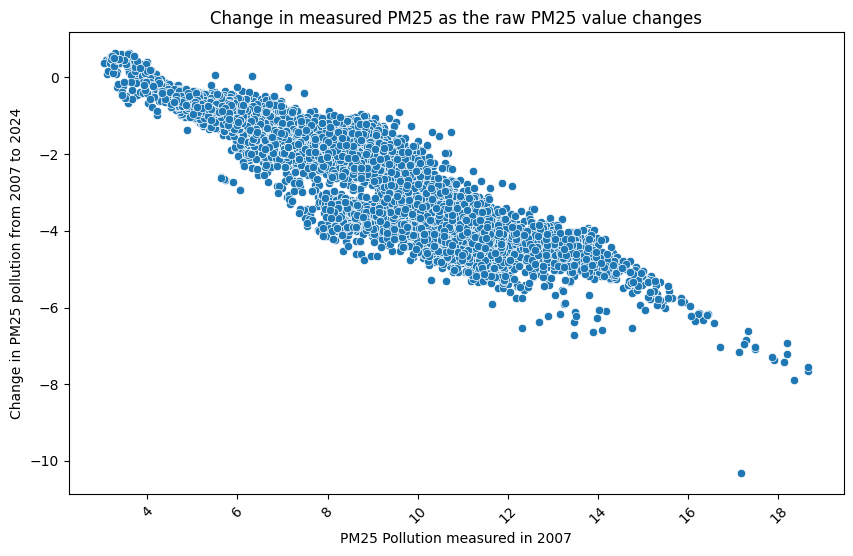

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="pm25_2007", y="delta_pm25")
plt.xticks(rotation=45)
plt.xlabel("PM25 Pollution measured in 2007")
plt.ylabel("Change in PM25 pollution from 2007 to 2024")
plt.title("Change in measured PM25 as the raw PM25 value changes")

plt.show()

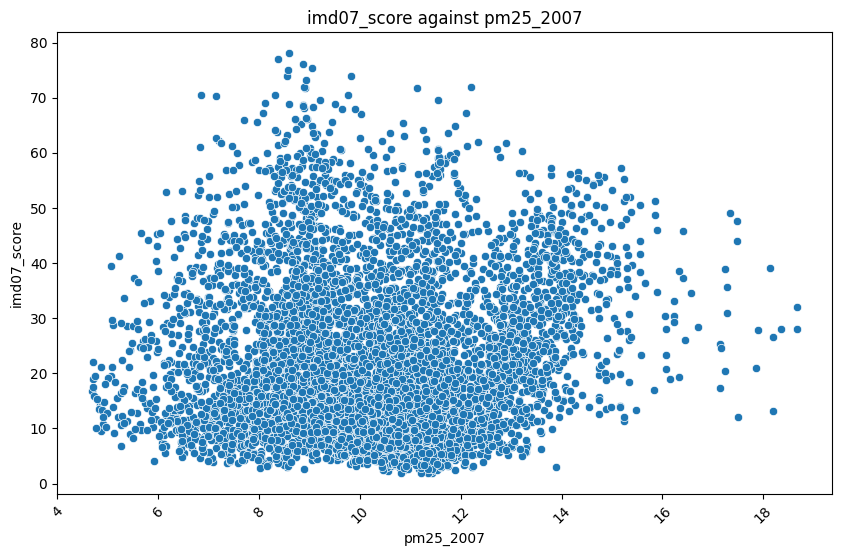

In [16]:
x = "pm25_2007"
y = "imd07_score"

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=x, y=y)
plt.xticks(rotation=45)
plt.xlabel(f"{x}")
plt.ylabel(f"{y}")
plt.title(f"{y} against {x}")

plt.show()

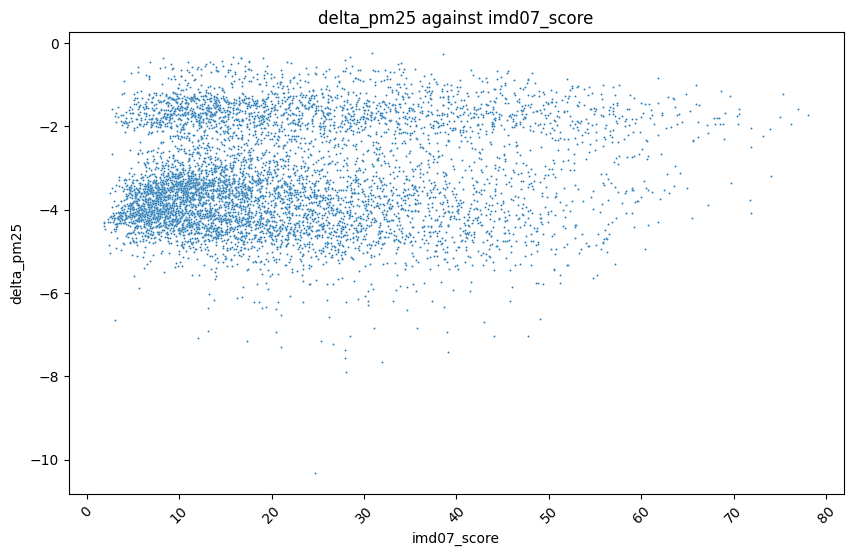

In [20]:
x = "imd07_score"
y = "delta_pm25"

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=x, y=y, s=2)
plt.xticks(rotation=45)
plt.xlabel(f"{x}")
plt.ylabel(f"{y}")
plt.title(f"{y} against {x}")

plt.show()

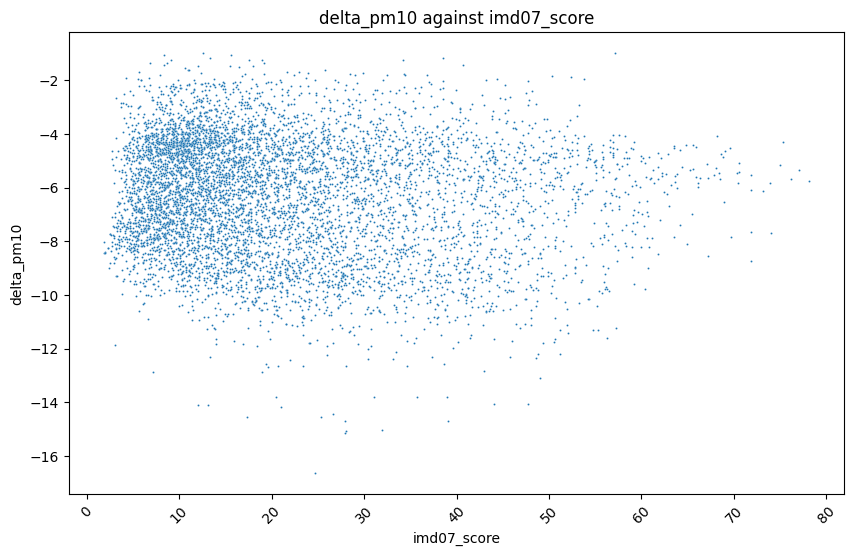

In [21]:
x = "imd07_score"
y = "delta_pm10"

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=x, y=y, s=2)
plt.xticks(rotation=45)
plt.xlabel(f"{x}")
plt.ylabel(f"{y}")
plt.title(f"{y} against {x}")

plt.show()

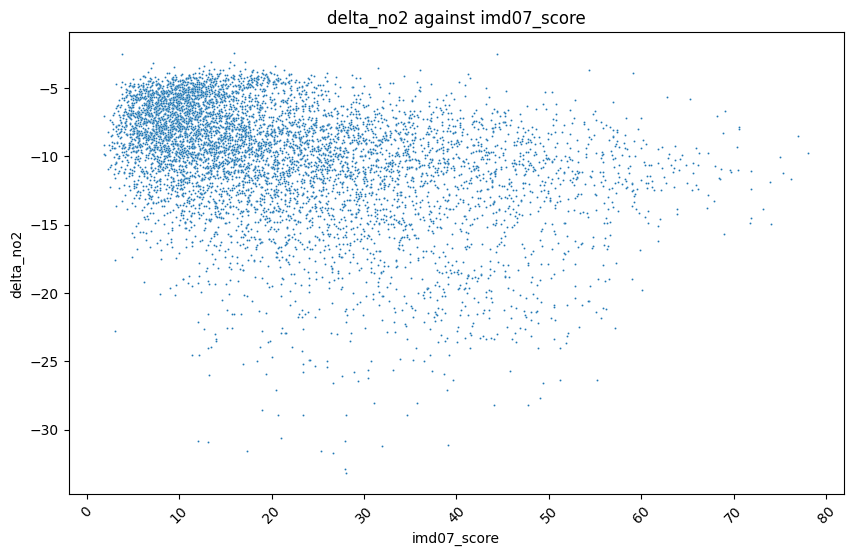

In [22]:
x = "imd07_score"
y = "delta_no2"

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=x, y=y, s=2)
plt.xticks(rotation=45)
plt.xlabel(f"{x}")
plt.ylabel(f"{y}")
plt.title(f"{y} against {x}")

plt.show()